# **Exploratory Data Analysis (EDA)**

EDA.jpg

Exploratory Data Analysis (EDA) is a crucial step in understanding the structure and characteristics of a dataset. It involves summarizing the main features of the data, identifying patterns, detecting missing or unusual values, and uncovering relationships between variables. Through visualizations and statistical techniques, EDA provides meaningful insights and helps build a strong foundation for informed analysis and decision-making.

## **Step : 1 Data Loading**
Data loading is the first step in any data analysis process, where raw weather information is imported into our working environment for exploration and processing.

Proper data loading ensures that the data is correctly read, structured, and ready for further cleaning and analysis, forming the foundation for accurate weather insights and predictions.

In [78]:
# Importing required modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Reading the weather data using polars data frame
weather_dataframe = pd.read_csv(r'/content/weather_data.csv')
weather_dataframe

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2025,67,S
1,2,36.0,118.0,8.0,72,5,2,2025,72,C
2,3,12.0,149.0,12.6,74,5,3,2025,74,PS
3,4,18.0,313.0,11.5,62,5,4,2025,62,S
4,5,NaN,NaN,14.3,56,5,5,2025,56,S
...,...,...,...,...,...,...,...,...,...,...
156,155,30.0,193.0,6.9,70,9,26,2025,70,PS
157,156,NaN,145.0,13.2,77,9,27,2025,77,S
158,157,14.0,191.0,14.3,75,9,28,2025,75,S
159,158,18.0,131.0,8.0,76,9,29,2025,76,C


## **Step 2: Basic Data Understanding**
- Dataframe shape
- head and tail
- dtypes
- describe
- value counts

In [41]:
# Getting the shape of the dataframe

weather_dataframe.shape

(161, 10)

From the above function we can confirm that the dataframe contains 161 rows and 10 columns.

In [42]:
# Getting the firt 5 rows of the dataframe

weather_dataframe.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2025,67,S
1,2,36.0,118.0,8.0,72,5,2,2025,72,C
2,3,12.0,149.0,12.6,74,5,3,2025,74,PS
3,4,18.0,313.0,11.5,62,5,4,2025,62,S
4,5,NaN,NaN,14.3,56,5,5,2025,56,S


In [43]:
#Getting the last 5 rows of the dataframe

weather_dataframe.tail()


,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,155,30.0,193.0,6.9,70,9,26,2025,70,PS
157,156,NaN,145.0,13.2,77,9,27,2025,77,S
158,157,14.0,191.0,14.3,75,9,28,2025,75,S
159,158,18.0,131.0,8.0,76,9,29,2025,76,C
160,158,18.0,131.0,8.0,76,9,29,2025,76,C


In [44]:
# Getting the datatypes of each columns from the weather_dataframe

weather_dataframe.dtypes

,0
Unnamed: 0,int64
Ozone,float64
Solar.R,float64
Wind,float64
Temp C,object
Month,object
Day,int64
Year,int64
Temp,int64
Weather,object


In [45]:
# Getting the full information about the dataframe

weather_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  161 non-null    int64  
 1   Ozone       123 non-null    float64
 2   Solar.R     154 non-null    float64
 3   Wind        161 non-null    float64
 4   Temp C      161 non-null    object 
 5   Month       161 non-null    object 
 6   Day         161 non-null    int64  
 7   Year        161 non-null    int64  
 8   Temp        161 non-null    int64  
 9   Weather     158 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.7+ KB


In [46]:
# Getting the decription of the dataframe

weather_dataframe.describe()

,Unnamed: 0,Ozone,Solar.R,Wind,Day,Year,Temp
count,161.000000,123.000000,154.000000,161.000000,161.000000,161.0,161.000000
mean,80.391304,41.837398,185.642857,9.903106,15.950311,2025.0,77.739130
std,46.121738,32.674343,88.237623,3.503274,9.066285,0.0,9.397155
min,1.000000,1.000000,7.000000,1.700000,1.000000,2025.0,56.000000
25%,41.000000,18.000000,121.750000,7.400000,8.000000,2025.0,72.000000
50%,80.000000,31.000000,195.500000,9.700000,16.000000,2025.0,78.000000
75%,120.000000,62.000000,257.500000,11.500000,24.000000,2025.0,84.000000
max,158.000000,168.000000,334.000000,20.700000,31.000000,2025.0,97.000000


In [47]:
# The above decription give only for the int values.
#For getting the description for the "Objects" we need to pass the argument "object" under the parameter "include"

weather_dataframe.describe(include='object')

,Temp C,Month,Weather
count,161,161,158
unique,41,6,3
top,81,9,S
freq,11,35,59


## **Step 3: Data Preperation**
- Dropping duplicate rows
- Dropping irrelevant columns
- Identifying duplicated columns
- Renaming Columns
- Handling Missing Values
- Creating Date column
- Outlier detection

In [48]:
# Getting the duplicated value from the dataframe

weather_dataframe.loc[weather_dataframe.duplicated()]

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
84,70,97.0,272.0,5.7,92,7,9,2025,92,C
155,154,41.0,190.0,7.4,67,5,1,2025,67,C
160,158,18.0,131.0,8.0,76,9,29,2025,76,C


In [49]:
# Droping the duplicated value

weather_dataframe = weather_dataframe.drop_duplicates(ignore_index=True)

In [50]:
# Removing the unwanted columns from the dataframe

weather_dataframe = weather_dataframe.drop(["Unnamed: 0","Temp C"], axis = 1)

In [51]:
weather_dataframe

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,NaN,14.3,5,5,2025,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2025,67,C
154,30.0,193.0,6.9,9,26,2025,70,PS
155,NaN,145.0,13.2,9,27,2025,77,S
156,14.0,191.0,14.3,9,28,2025,75,S


In [52]:
# Renaming the column "Solar.R" to "Solar"

weather_dataframe = weather_dataframe.rename({"Solar.R":"Solar"}, axis=1)

In [53]:
weather_dataframe

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,NaN,14.3,5,5,2025,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2025,67,C
154,30.0,193.0,6.9,9,26,2025,70,PS
155,NaN,145.0,13.2,9,27,2025,77,S
156,14.0,191.0,14.3,9,28,2025,75,S


In [54]:
# Checking the  sum of the null values inside the dataframe.

weather_dataframe.isna().sum()

,0
Ozone,38
Solar,7
Wind,0
Month,0
Day,0
Year,0
Temp,0
Weather,3


In [55]:
# Removing the null value by replacing the mean value of each column.

weather_dataframe["Ozone"] = weather_dataframe["Ozone"].fillna(weather_dataframe["Ozone"].mean())
weather_dataframe["Solar"] = weather_dataframe["Solar"].fillna(weather_dataframe["Solar"].mean())


In [56]:
weather_dataframe

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.000000,190.000000,7.4,5,1,2025,67,S
1,36.000000,118.000000,8.0,5,2,2025,72,C
2,12.000000,149.000000,12.6,5,3,2025,74,PS
3,18.000000,313.000000,11.5,5,4,2025,62,S
4,41.583333,185.403974,14.3,5,5,2025,56,S
...,...,...,...,...,...,...,...,...
153,41.000000,190.000000,7.4,5,1,2025,67,C
154,30.000000,193.000000,6.9,9,26,2025,70,PS
155,41.583333,145.000000,13.2,9,27,2025,77,S
156,14.000000,191.000000,14.3,9,28,2025,75,S


In [57]:
# Getting the unique value from the month

weather_dataframe["Month"].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [58]:
weather_dataframe["Month"] = weather_dataframe["Month"].replace({"May": "5"})

In [59]:
# After updating the month value

weather_dataframe["Month"].unique()

array(['5', '6', '7', '8', '9'], dtype=object)

In [60]:
# Converting the year, mont, date to new column as date

weather_dataframe["Date"] = pd.to_datetime(weather_dataframe[["Year", "Month", "Day"]])

weather_dataframe

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Date
0,41.000000,190.000000,7.4,5,1,2025,67,S,2025-05-01
1,36.000000,118.000000,8.0,5,2,2025,72,C,2025-05-02
2,12.000000,149.000000,12.6,5,3,2025,74,PS,2025-05-03
3,18.000000,313.000000,11.5,5,4,2025,62,S,2025-05-04
4,41.583333,185.403974,14.3,5,5,2025,56,S,2025-05-05
...,...,...,...,...,...,...,...,...,...
153,41.000000,190.000000,7.4,5,1,2025,67,C,2025-05-01
154,30.000000,193.000000,6.9,9,26,2025,70,PS,2025-09-26
155,41.583333,145.000000,13.2,9,27,2025,77,S,2025-09-27
156,14.000000,191.000000,14.3,9,28,2025,75,S,2025-09-28


## **Step 4: Univariate Analysis (Feature Understanding )**
- Analyzing Categorical Features
  - Value Counts, Bar Charts
- Analyzing Numerical Features
  - Mean, Median, Mode, Variance, Skewness, Kurtosis
  - Histograms, Boxplots, Violin Plots
- Feature Distributions
  - KDE Plots
  - Distribution Plots (Seaborn, Plotly)

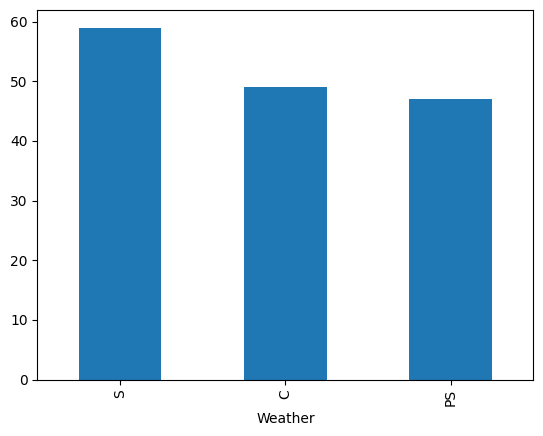

In [61]:
weather_dataframe["Weather"].value_counts().plot(kind='bar')
plt.show()

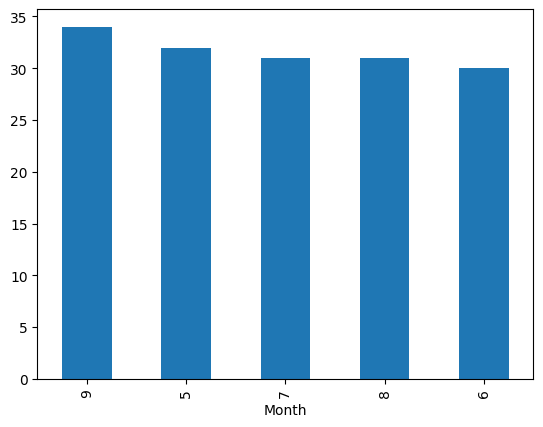

In [62]:
weather_dataframe["Month"].value_counts().plot(kind='bar')
plt.show()

In [63]:
# Checking the skewness of the dataframe

weather_dataframe.skew(numeric_only=True)

,0
Ozone,1.466553
Solar,-0.426086
Wind,0.349332
Day,-0.036407
Year,0.000000
Temp,-0.340108


The skewness analysis shows that most variables in the weather dataset are close to a normal distribution, with slight deviations. Ozone exhibits a strong positive skew, indicating a concentration of lower values with a few unusually high readings, suggesting possible outliers. Solar and temperature data show mild negative skewness, meaning slightly more higher values, while wind is only slightly positively skewed and remains fairly balanced. The Day and Year variables show almost zero skewness, reflecting an evenly distributed and time-structured dataset. Overall, the dataset is largely balanced, with Ozone being the only feature that may require attention due to its noticeable right skew.

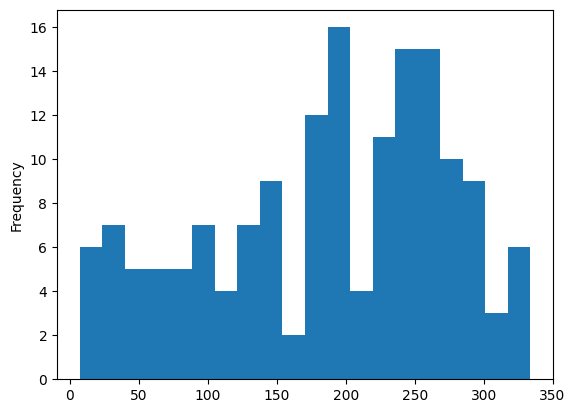

In [64]:
weather_dataframe["Solar"].plot(kind='hist', bins=20)
plt.show()

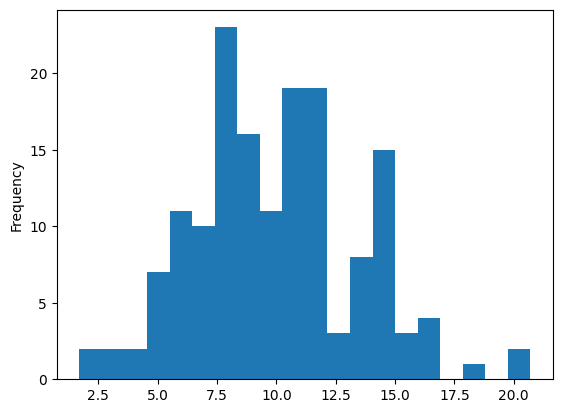

In [65]:
weather_dataframe["Wind"].plot(kind='hist', bins=20)
plt.show()

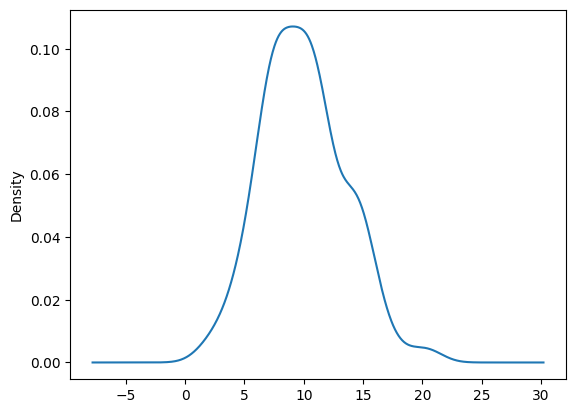

In [66]:
weather_dataframe["Wind"].plot(kind='kde')
plt.show()

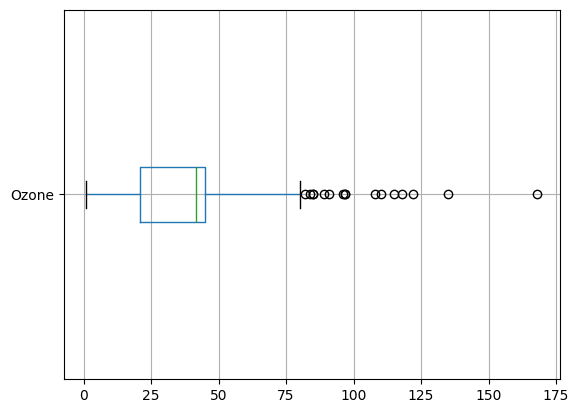

In [67]:
weather_dataframe.boxplot(column="Ozone", vert=False)
plt.show()

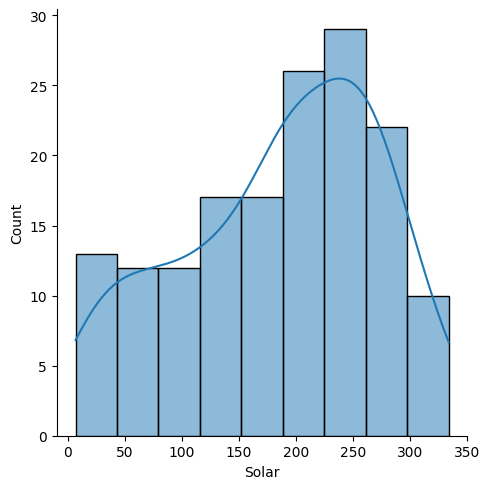

In [68]:
sns.displot(data=weather_dataframe, x='Solar', kind='hist', kde=True)
plt.show()

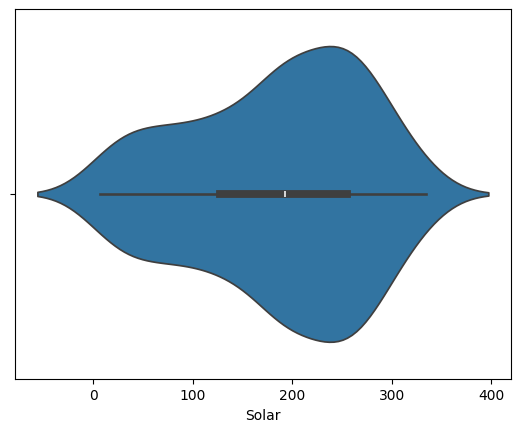

In [69]:
sns.violinplot(data=weather_dataframe, x="Solar")
plt.show()

## **Step 5: Bivariate and Multivariate Analysis (Feature Relationships)**
- Numerical vs Numerical
  - Scatterplots, Correlation Matrix (heatmap), Pairplots
- Categorical vs Numerical
  - Boxplots, Violin Plots, Barplots
- Categorical vs Categorical
  - Crosstabs
- Date vs Numerical
- Grouped Statistics with .groupby()

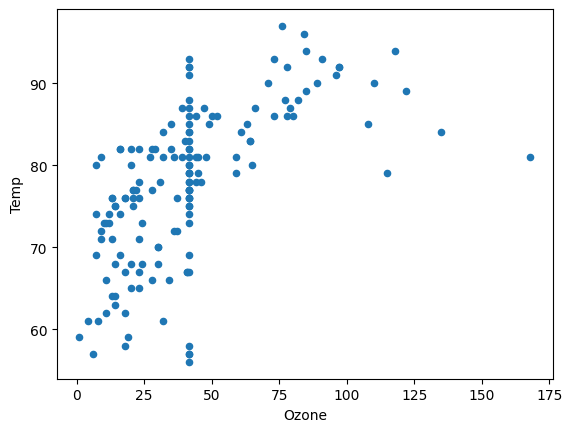

In [70]:
weather_dataframe.plot(kind="scatter", x="Ozone", y="Temp")
plt.show()

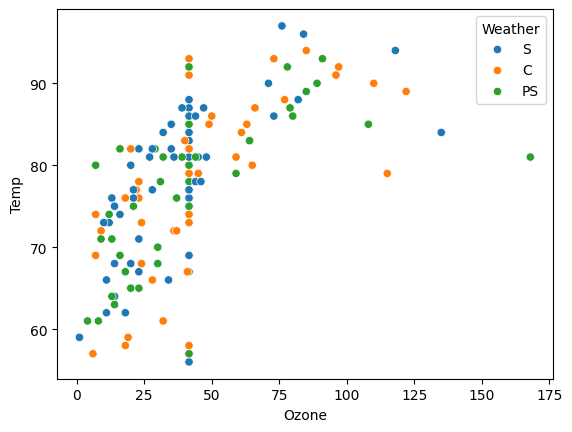

In [71]:
sns.scatterplot(data=weather_dataframe, x="Ozone", y="Temp", hue="Weather")
plt.show()

In [72]:
# Dropping the unwanted column "Year"

weather_dataframe = weather_dataframe.drop(["Year"], axis=1)
weather_dataframe

,Ozone,Solar,Wind,Month,Day,Temp,Weather,Date
0,41.000000,190.000000,7.4,5,1,67,S,2025-05-01
1,36.000000,118.000000,8.0,5,2,72,C,2025-05-02
2,12.000000,149.000000,12.6,5,3,74,PS,2025-05-03
3,18.000000,313.000000,11.5,5,4,62,S,2025-05-04
4,41.583333,185.403974,14.3,5,5,56,S,2025-05-05
...,...,...,...,...,...,...,...,...
153,41.000000,190.000000,7.4,5,1,67,C,2025-05-01
154,30.000000,193.000000,6.9,9,26,70,PS,2025-09-26
155,41.583333,145.000000,13.2,9,27,77,S,2025-09-27
156,14.000000,191.000000,14.3,9,28,75,S,2025-09-28


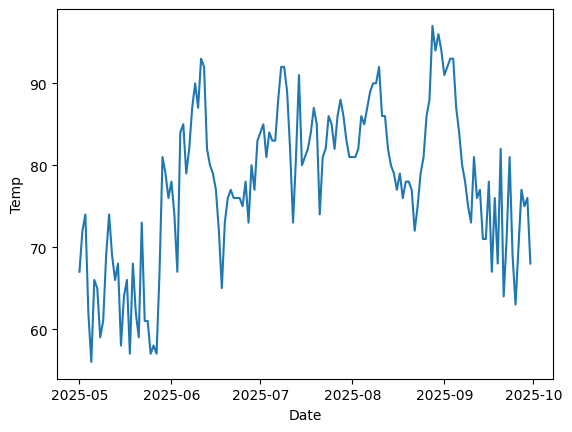

In [77]:
sns.lineplot(data=weather_dataframe, x="Date", y="Temp")
plt.show()

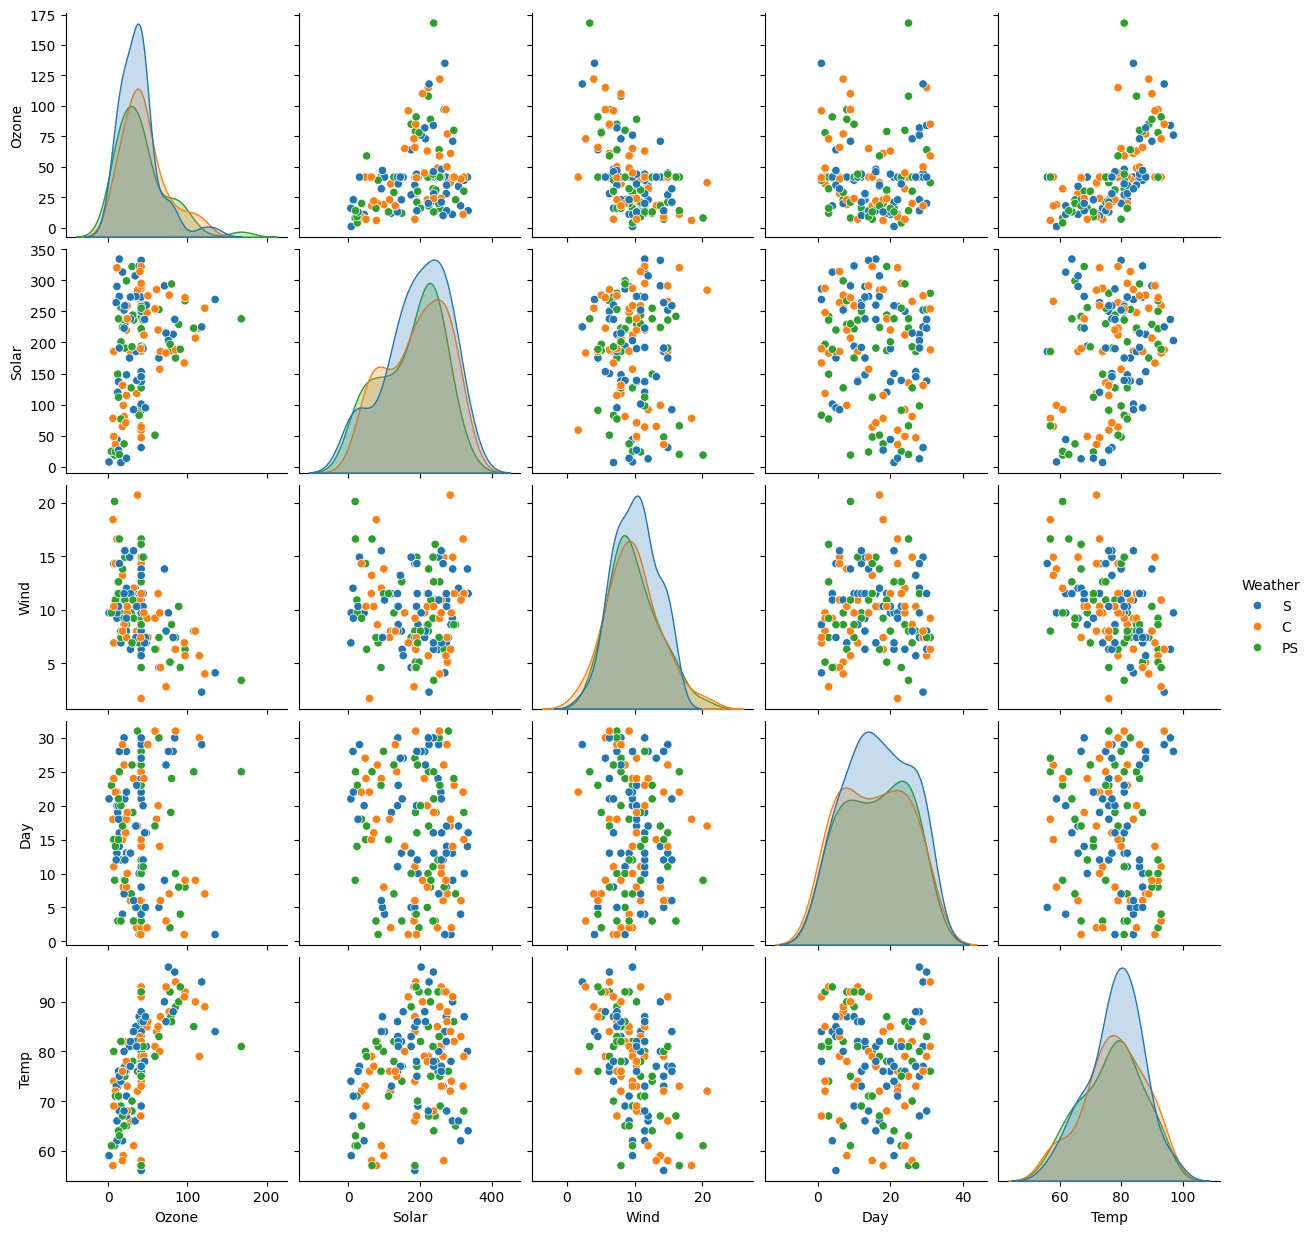

In [73]:
sns.pairplot(data=weather_dataframe, hue="Weather")
plt.show()

In [74]:
# Calculate the correlation matrix of the dataframe

weather_dataframe.corr(numeric_only=True)

,Ozone,Solar,Wind,Day,Temp
Ozone,1.000000,0.303166,-0.523806,-0.030241,0.606275
Solar,0.303166,1.000000,-0.055092,-0.149606,0.260473
Wind,-0.523806,-0.055092,1.000000,0.040151,-0.441247
Day,-0.030241,-0.149606,0.040151,1.000000,-0.124538
Temp,0.606275,0.260473,-0.441247,-0.124538,1.000000


Correlation Matrix helps us to understand the relationship strength and direction between variables.

Helps identify patterns — for example:

Positive correlation: both values increase together.

Negative correlation: one increases while the other decreases.

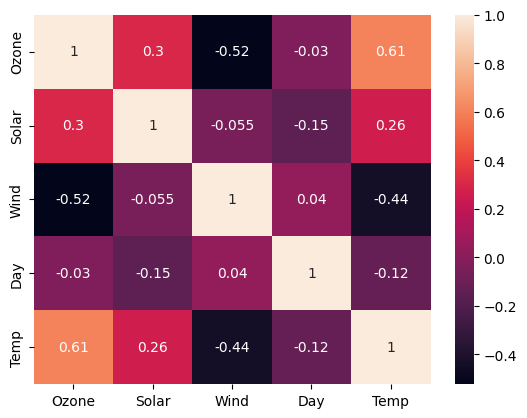

In [75]:
sns.heatmap(weather_dataframe.corr(numeric_only=True), annot=True)
plt.show()

**Major Positive Correlations**

Ozone & Temperature (0.61)
Ozone levels tend to increase with rising temperature. This suggests that warmer days are associated with higher ozone concentration, possibly due to enhanced photochemical reactions.

Ozone & Solar Radiation (0.30)
Moderate positive relationship indicating higher solar radiation contributes to higher ozone formation.

Solar Radiation & Temperature (0.26)
More sunlight generally coincides with warmer temperatures, as expected.

**Major Negative Correlations**

Ozone & Wind Speed (-0.52)
Strong negative correlation showing higher wind speed reduces ozone levels. Wind likely disperses ozone, lowering local concentration.

Wind Speed & Temperature (-0.44)
Higher wind speeds tend to occur on cooler days, reducing temperature buildup.

Solar Radiation & Day (-0.15)
Slight negative correlation — likely not practically significant.

**Weak / No Correlation**

Ozone & Day (-0.03)

Wind & Day (0.04)

Day & Temperature (-0.12)
These values indicate almost no association, meaning the daily index itself doesn’t strongly relate to the other variables.

**Overall Interpretation**

Sunny, hot, low-wind days lead to high ozone levels.

Windy or cooler weather lowers ozone concentration.

The day sequence has minimal effect on environmental variables.